In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats

In [52]:
df2 = pd.read_csv("한국_방문_선택_시_고려요인.csv", encoding='cp949')
df2.head()

,통계분류(1),통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13
0,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
1,전체,소계,1398,20.1,12.7,11.4,4,3.9,1.5,1.4,1.4,1.1,0.7,0.6,0.4,41
2,월별,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,월별,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,월별,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37


In [53]:
df2.rename(columns = {"2021":"사례수","2021.1":"음식/미식탐방", "2021.2":"쇼핑", "2021.3":"자연 풍경 감상", "2021.4":"패션 유행 등 세련된 현대 문화 체험",
                       "2021.5":"역사/문화유적/전통문화 체험", "2021.6":"유흥/놀이 시설 체험", "2021.7":"치료 및 미용 서비스 체험", 
                       "2021.8":"여행 가능한 여가시간", "2021.9":"K-POP/한류스타 관련 공연팬미팅촬영지 등 체험", 
                       "2021.10":"레저 및 스포츠 활동", "2021.11":"자국과의 이동거리", "2021.12":"경제적인 여행비용","2021.13":"기타"}, inplace=True)
df2.head()

,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
1,전체,소계,1398,20.1,12.7,11.4,4,3.9,1.5,1.4,1.4,1.1,0.7,0.6,0.4,41
2,월별,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,월별,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,월별,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37


In [54]:
df2_country = df2.iloc[18:39:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
df2_country.head()

,통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
18,일본,26,30.8,7.7,3.8,3.8,0,0,0,0,0,0,3.8,0,50
19,중국,297,19.2,22.6,16.8,11.8,1.7,0,1.3,0,0,0.3,0.3,0,25.9
20,홍콩,1,0,100,0,0,0,0,0,0,0,0,0,0,0
21,싱가포르,181,44.2,18.2,16.6,1.1,3.9,3.3,0.6,1.1,3.3,2.8,1.1,0,3.9
22,대만,12,33.3,16.7,0,8.3,16.7,0,8.3,0,0,0,0,0,16.7


In [55]:
df2_country.rename(columns = {"통계분류(2)":"국가별"}, inplace=True)
df2_country.head()

,국가별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
18,일본,26,30.8,7.7,3.8,3.8,0,0,0,0,0,0,3.8,0,50
19,중국,297,19.2,22.6,16.8,11.8,1.7,0,1.3,0,0,0.3,0.3,0,25.9
20,홍콩,1,0,100,0,0,0,0,0,0,0,0,0,0,0
21,싱가포르,181,44.2,18.2,16.6,1.1,3.9,3.3,0.6,1.1,3.3,2.8,1.1,0,3.9
22,대만,12,33.3,16.7,0,8.3,16.7,0,8.3,0,0,0,0,0,16.7


In [56]:
# csv파일로 data를 불렀고 columns이름을 한국방문 시 고려요인으로 바꿈. 

# 선호도조사 분석에서 알아본 한국문화콘텐츠에 대해 알아봤다.
# 한국문화콘텐츠라고 할 수 있는 '패션 유행 등 세련된 현대 문화 체험', '치료 및 미용 서비스 체험', 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'이 방한목적과 관련이 있는가?
# 이것을 알아보기 위해 회귀분석 실시
# 관련이 있다면 얼마나 밀접한 관련이 있는가? Pearson, correlation
# 어떤 예측을 할 수 있는가? 

# 상관이 없다면 다른 고려요인과의 관계는 어떨까..?


In [57]:
df2_country.sum(axis=0)

국가별                            일본중국홍콩싱가포르대만태국말레이시아호주미국캐나다영국독일프랑스러시아중동인도필리핀인도네...
사례수                                      262971181122354449235728712623377910136
음식/미식탐방                        30.819.2044.233.321.7402511.8131421.416.926.91...
쇼핑                             7.722.610018.216.739.140254.54.38.83.64.215.41...
자연 풍경 감상                       3.816.8016.6021.720257.301410.74.27.78.733.328...
패션 유행 등 세련된 현대 문화 체험           3.811.801.18.30000.901.802.83.84.3014.3011.1103.7
역사/문화유적/전통문화 체험                      01.703.916.74.3002.74.3710.78.53.80000008.8
유흥/놀이 시설 체험                                     0003.300001.605.302.8000000101.5
치료 및 미용 서비스 체험                        01.300.68.34.3001.14.300011.5000011.1100.7
여행 가능한 여가시간                                    0001.104.30024.3001.404.3000002.9
K-POP/한류스타 관련 공연팬미팅촬영지 등 체험                        0003.300000.900003.80000002.9
레저 및 스포츠 활동                                      00.302.800000.401.83.6000000000
자국과의 이동거리                   

In [58]:
df2_country.dtypes

국가별                            object
사례수                            object
음식/미식탐방                        object
쇼핑                             object
자연 풍경 감상                       object
패션 유행 등 세련된 현대 문화 체험           object
역사/문화유적/전통문화 체험                object
유흥/놀이 시설 체험                    object
치료 및 미용 서비스 체험                 object
여행 가능한 여가시간                    object
K-POP/한류스타 관련 공연팬미팅촬영지 등 체험    object
레저 및 스포츠 활동                    object
자국과의 이동거리                      object
경제적인 여행비용                      object
기타                             object
dtype: object

In [59]:
df2_country.set_index('국가별',inplace=True)
df2_country = df2_country.astype('float')   #inplace 가 없음
df2_country.reset_index(inplace=True)
df2_country.head()

,국가별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,일본,26.0,30.8,7.7,3.8,3.8,0.0,0.0,0.0,0.0,0.0,0.0,3.8,0.0,50.0
1,중국,297.0,19.2,22.6,16.8,11.8,1.7,0.0,1.3,0.0,0.0,0.3,0.3,0.0,25.9
2,홍콩,1.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,싱가포르,181.0,44.2,18.2,16.6,1.1,3.9,3.3,0.6,1.1,3.3,2.8,1.1,0.0,3.9
4,대만,12.0,33.3,16.7,0.0,8.3,16.7,0.0,8.3,0.0,0.0,0.0,0.0,0.0,16.7


In [60]:
df2_country.dtypes

# type이 숫자형태가 아니어서 object-> float 로 변경함. 
# 변수들이 percentage여서 개수로 변경해줘야한다. 

국가별                             object
사례수                            float64
음식/미식탐방                        float64
쇼핑                             float64
자연 풍경 감상                       float64
패션 유행 등 세련된 현대 문화 체험           float64
역사/문화유적/전통문화 체험                float64
유흥/놀이 시설 체험                    float64
치료 및 미용 서비스 체험                 float64
여행 가능한 여가시간                    float64
K-POP/한류스타 관련 공연팬미팅촬영지 등 체험    float64
레저 및 스포츠 활동                    float64
자국과의 이동거리                      float64
경제적인 여행비용                      float64
기타                             float64
dtype: object

In [61]:
df2_country_copy = df2_country.copy()
df2_country_copy['음식/미식탐방'] = df2_country_copy['사례수']*df2_country_copy['음식/미식탐방']/100
df2_country_copy['쇼핑'] = df2_country_copy['사례수']*df2_country_copy['쇼핑']/100
df2_country_copy['자연 풍경 감상'] = df2_country_copy['사례수']*df2_country_copy['자연 풍경 감상']/100
df2_country_copy['패션 유행 등 세련된 현대 문화 체험'] = df2_country_copy['사례수']*df2_country_copy['패션 유행 등 세련된 현대 문화 체험']/100
df2_country_copy['역사/문화유적/전통문화 체험'] = df2_country_copy['사례수']*df2_country_copy['역사/문화유적/전통문화 체험']/100
df2_country_copy['유흥/놀이 시설 체험'] = df2_country_copy['사례수']*df2_country_copy['유흥/놀이 시설 체험']/100
df2_country_copy['치료 및 미용 서비스 체험'] = df2_country_copy['사례수']*df2_country_copy['치료 및 미용 서비스 체험']/100
df2_country_copy['여행 가능한 여가시간'] = df2_country_copy['사례수']*df2_country_copy['여행 가능한 여가시간']/100
df2_country_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'] = df2_country_copy['사례수']*df2_country_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']/100
df2_country_copy['레저 및 스포츠 활동'] = df2_country_copy['사례수']*df2_country_copy['레저 및 스포츠 활동']/100
df2_country_copy['자국과의 이동거리'] = df2_country_copy['사례수']*df2_country_copy['자국과의 이동거리']/100
df2_country_copy['경제적인 여행비용'] = df2_country_copy['사례수']*df2_country_copy['경제적인 여행비용']/100
df2_country_copy['기타'] = df2_country_copy['사례수']*df2_country_copy['기타']/100

In [62]:
df2_country_copy = pd.concat([df2_country_copy['사례수'],df2_country_copy['음식/미식탐방'],df2_country_copy['쇼핑'],
           df2_country_copy['자연 풍경 감상'],df2_country_copy['패션 유행 등 세련된 현대 문화 체험'],
           df2_country_copy['역사/문화유적/전통문화 체험'],df2_country_copy['유흥/놀이 시설 체험'],df2_country_copy['치료 및 미용 서비스 체험'],
           df2_country_copy['여행 가능한 여가시간'],df2_country_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'],
           df2_country_copy['레저 및 스포츠 활동'],df2_country_copy['자국과의 이동거리'],df2_country_copy['경제적인 여행비용'],
           df2_country_copy['기타']],axis=1)
df2_country_copy.head()

,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,26.0,8.008,2.002,0.988,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.988,0.0,13.000
1,297.0,57.024,67.122,49.896,35.046,5.049,0.000,3.861,0.000,0.000,0.891,0.891,0.0,76.923
2,1.0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000
3,181.0,80.002,32.942,30.046,1.991,7.059,5.973,1.086,1.991,5.973,5.068,1.991,0.0,7.059
4,12.0,3.996,2.004,0.000,0.996,2.004,0.000,0.996,0.000,0.000,0.000,0.000,0.0,2.004


In [63]:
df2_country_copy = df2_country_copy.round(0)

# 소수점 첫번째에서 반올림 했을 때 각 사례별 수의 합이 사례수와 같음을 알 수 있다. 
# 따라서 소수점 첫번째자리에서 반올림을 하고 float형태를 int형태로 변경해줌. 

In [64]:
df2_country_copy = df2_country_copy.astype(int)
df2_country_copy.head()

,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,26,8,2,1,1,0,0,0,0,0,0,1,0,13
1,297,57,67,50,35,5,0,4,0,0,1,1,0,77
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,181,80,33,30,2,7,6,1,2,6,5,2,0,7
4,12,4,2,0,1,2,0,1,0,0,0,0,0,2


In [65]:
df2_country_copy = pd.concat([df2_country['국가별'], df2_country_copy], axis=1)
df2_country_copy.head()

,국가별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,일본,26,8,2,1,1,0,0,0,0,0,0,1,0,13
1,중국,297,57,67,50,35,5,0,4,0,0,1,1,0,77
2,홍콩,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,싱가포르,181,80,33,30,2,7,6,1,2,6,5,2,0,7
4,대만,12,4,2,0,1,2,0,1,0,0,0,0,0,2


In [66]:
print('mean = ', df2_country_copy['사례수'].mean())
print('median = ', df2_country_copy['사례수'].median())

mean =  66.57142857142857
median =  23.0


In [67]:
print("['사례수']>mean' count = ", (df2_country_copy[df2_country_copy['사례수']>66]['사례수']).count())
print("['사례수']>median' count = ", (df2_country_copy[df2_country_copy['사례수']>23]['사례수']).count())

['사례수']>mean' count =  5
['사례수']>median' count =  9


In [68]:
# 홍콩, 말레이시아, 호주 등 사례수가 너무 적은 경우는 분석하기에 적합하지 않다고 판단함. 
# 따라서 사례수의 중앙값을 구하고 그 중앙값보다 큰 사례수를 가진 국가들을 가지고 방한목적 별 분석을 실시하려고 함. 
# 중앙값보다 큰 것을 택하는 것이 평균값보다 국가별 sample data 수가 많기 때문에 중앙값을 기준으로 함. 

In [69]:
df2_country2 = df2_country_copy[df2_country_copy['사례수'] >23]
df2_country2

,국가별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,일본,26,8,2,1,1,0,0,0,0,0,0,1,0,13
1,중국,297,57,67,50,35,5,0,4,0,0,1,1,0,77
3,싱가포르,181,80,33,30,2,7,6,1,2,6,5,2,0,7
8,미국,449,53,20,33,4,12,7,5,9,4,2,3,1,296
10,영국,57,8,5,8,1,4,3,0,0,0,1,0,3,24
11,독일,28,6,1,3,0,3,0,0,0,0,1,0,0,14
12,프랑스,71,12,3,3,2,6,2,0,1,0,0,0,0,42
13,러시아,26,7,4,2,1,1,0,3,0,1,0,0,0,7
20,기타,136,27,15,14,5,12,2,1,4,4,0,1,1,50


In [70]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family'] = 'NanumGothic'

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\LG\.matplotlib


In [71]:
#Q1. k-content가 방한목적과 관련이 있는지에 대해 correlation 분석 
# 한국문화에 대한 대중적 인기비율을 조사한 결과 콘텐츠 중 상위 4가지 택함. '한식 > 뷰티 > 음악 > 패션' 순으로 높게 나옴. 
# 한식: '음식/미식탐방', 뷰티: '치료 및 가능한 여가시간', 음악: 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험', 패션: '패션 유행 등 세련된 현대 문화 체험'
# 상위 4가지의 콘텐츠를 위와 같은 방학목적 column으로 정해서 분석할 것이다. 

In [72]:
df2_pur = df2_country2[['사례수','음식/미식탐방', '치료 및 미용 서비스 체험', 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험', '패션 유행 등 세련된 현대 문화 체험']]
df2_pur

,사례수,음식/미식탐방,치료 및 미용 서비스 체험,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,패션 유행 등 세련된 현대 문화 체험
0,26,8,0,0,1
1,297,57,4,0,35
3,181,80,1,6,2
8,449,53,5,4,4
10,57,8,0,0,1
11,28,6,0,0,0
12,71,12,0,0,2
13,26,7,3,1,1
20,136,27,1,4,5


In [115]:
df2_country2['치료 및 미용 서비스 체험'].median()

1.0

In [73]:
cormat = df2_pur.corr()
round(cormat,2)

,사례수,음식/미식탐방,치료 및 미용 서비스 체험,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,패션 유행 등 세련된 현대 문화 체험
사례수,1.00,0.75,0.81,0.48,0.48
음식/미식탐방,0.75,1.00,0.51,0.72,0.44
치료 및 미용 서비스 체험,0.81,0.51,1.00,0.27,0.52
K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,0.48,0.72,0.27,1.00,-0.17
패션 유행 등 세련된 현대 문화 체험,0.48,0.44,0.52,-0.17,1.00


C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


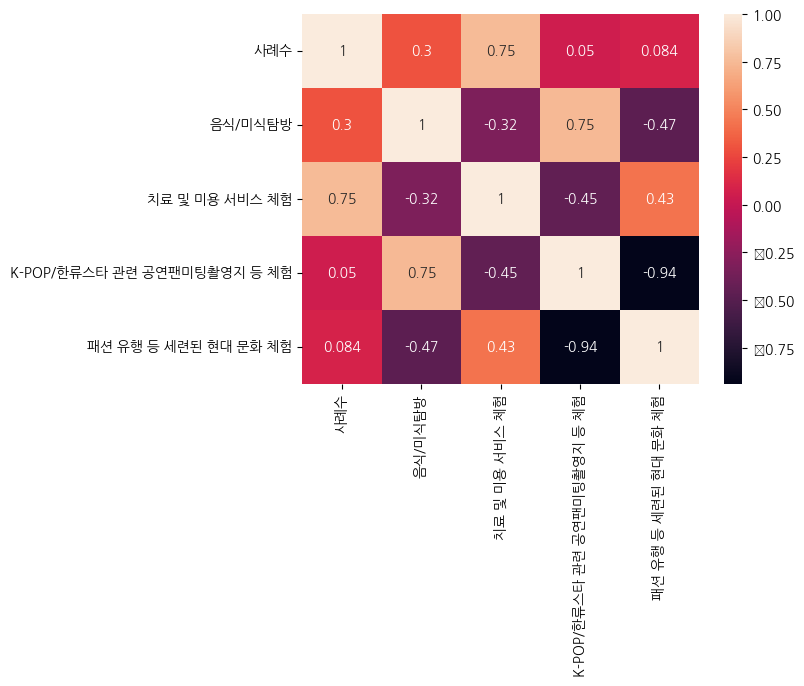

In [74]:
#plt.figure(figsize=(20,10))
sns.heatmap(cormat.corr(),annot=True)
plt.show()

In [75]:
# 한국 콘텐츠 선호도 조사의 상위 4개의 콘텐츠와 방한목적과의 관계에 대한 분석 결과
# 편의상 1위, 2위라고 하면 한식과 뷰티는 방한목적과 관계이 있었고 3위와 4위였던 음악과 패션은 관계가 없었음을 알았다. 
# '음식/미식탐방'은 0.3으로 약한 상관관계를 나타내고 '치료 및 미용 서비스 체험'은 0.75로 강한 상관관계를 나타내므로 회귀분석을 진행 


In [76]:
#사례수와 음식/미식탐방 회귀분석

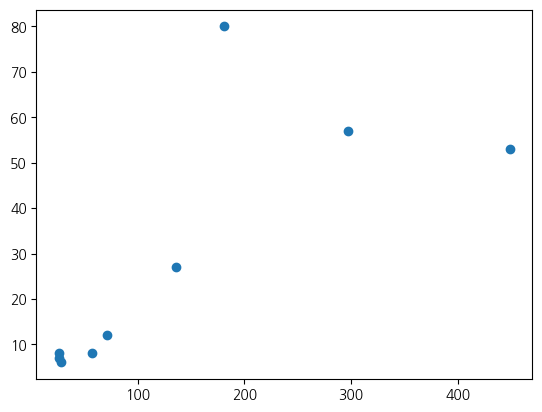

In [77]:
plt.scatter(x="사례수", y="음식/미식탐방", data=df2_country2)
#산점도를 통해 분포를 확인 -> 양적 상관관계가 있어보임. 

In [78]:
#선형관계가 있어보이므로 사례수와 음식/미식탐방에 대한 상관분석을 진행
print(stats.pearsonr(df2_country2['사례수'], df2_country2['음식/미식탐방']))

# p-value값이 0.02로 0.05보다 작은 값을 가짐으로 두 변수가 association이 있음을 알 수 있다. 

PearsonRResult(statistic=0.747533304986946, pvalue=0.020585068390255628)


In [79]:
#구체적으로 확인해보기 위해 선형회귀식 만들기

#numpy의 polyfit로 회귀식
x=np.polyfit(df2_country2['사례수'], df2_country2['음식/미식탐방'], 1)
print("기울기:", x[0], "y절편:", x[1])

기울기: 0.14132982255768106 y절편: 8.70775505879861


In [80]:
#statsmodel을 이용한 회귀분석

import statsmodels.formula.api as smf
df2_country2.rename(columns = {"음식/미식탐방": "음식"}, inplace=True)
model = smf.ols(formula = '음식 ~ 사례수', data = df2_country2)
result = model.fit()
result.summary()
#회귀분석 모델이 적합한지를 보았을 때, 음식/미식탐방을 사례수가 56%정도 설명해주고 있다
#p값이 0.02로 0.05보다 작으므로 이 모형은 의미있는 모형이라고 할 수 있다

#회귀계수
#절편의 추정치는 8.7078로 사례수가 0일때, 음식/미식탐방의 값이다
#사례수의 계수 추정치는 0.1413으로 음식/미식탐방이 1 증가할 때마다 사례수가 0.1413 증가한다.
#numpy로 구한 회귀식의 회귀계수와 비교해봤을 때, 거의 비슷한 것으로 보인다.

C:\Users\LG\AppData\Local\Temp\ipykernel_20508\3044438244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_country2.rename(columns = {"음식/미식탐방": "음식"}, inplace=True)
C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     음식   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     8.866
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0206
Time:                        22:40:10   Log-Likelihood:                -38.458
No. Observations:                   9   AIC:                             80.92
Df Residuals:                       7   BIC:                             81.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7078      9.380      0.928      0.384     -13.473      30.888
사례수            0.1413      0.047      2.978      0.021       0.029       0.254
==============================================================================
Omnibus:                       16.318   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.530
Skew:                           1.852   Prob(JB):                       0.0232
Kurtosis:                       5.522   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\LG\AppData\Local\Temp\ipykernel_20508\2379959882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_country2.rename(columns = {'음식':'음식/미식탐방'}, inplace=True)


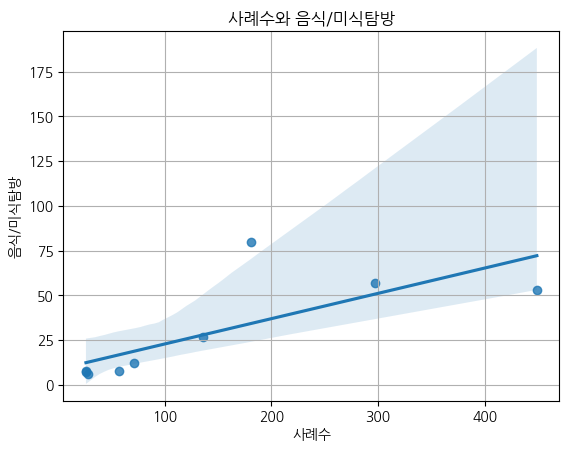

In [81]:
#그래프를 그려봄
df2_country2.rename(columns = {'음식':'음식/미식탐방'}, inplace=True)
sns.regplot(x="사례수", y="음식/미식탐방", data=df2_country2)
plt.title('사례수와 음식/미식탐방')
plt.grid()
plt.show()
#이들의 추세를 직선으로 나타낸 회귀선을 보면 우상향 하는 경향을 보이고 있는 것을 알 수 있다. 따라서 음식/미식탐방과 사례수 두 변수는 양의 인과관계가 있음

In [82]:
#사례수와 치료 및 미용 서비스 체험에 대한 회귀분석

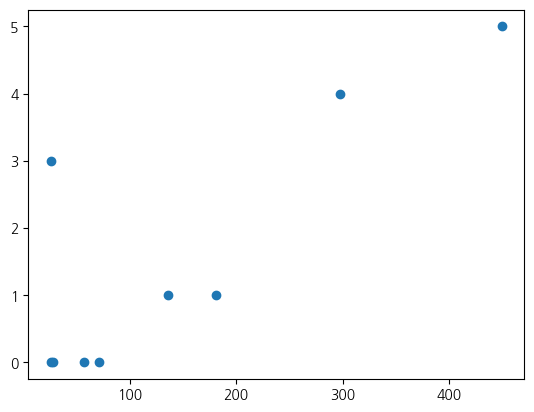

In [83]:
plt.scatter(x="사례수", y="치료 및 미용 서비스 체험", data=df2_country2)
#산점도를 통해 분포를 확인 -> 양적 상관관계가 있어보임. 

In [84]:
#선형관계가 있어보이므로 사례수와 음식/미식탐방에 대한 상관분석을 진행
print(stats.pearsonr(df2_country2['사례수'], df2_country2['음식/미식탐방']))

# p-value값이 0.02로 0.05보다 작은 값을 가짐으로 두 변수가 association이 있음을 알 수 있다. 

PearsonRResult(statistic=0.747533304986946, pvalue=0.020585068390255628)


In [85]:
#구체적으로 확인해보기 위해 선형회귀식 만들기

#numpy의 polyfit로 회귀식
x=np.polyfit(df2_country2['사례수'], df2_country2['치료 및 미용 서비스 체험'], 1)
print("기울기:", x[0], "y절편:", x[1])

기울기: 0.010761009718371373 y절편: 0.035861849772222225


In [86]:
#statsmodel을 이용한 회귀분석

import statsmodels.formula.api as smf
df2_country2.rename(columns = {"치료 및 미용 서비스 체험": "치료미용"},inplace=True)
model = smf.ols(formula = '치료미용 ~ 사례수', data = df2_country2)
result = model.fit()
result.summary()
#회귀분석 모델이 적합한지를 보았을 때, 치료 및 미용 서비스 체험을 사례수가 65%정도 설명해주고 있다
#p값이 0.000788로 0.05보다 작으므로 이 모형은 의미있는 모형이라고 할 수 있다

#회귀계수
#절편의 추정치는 0.0359로 사례수가 0일때, 음식/미식탐방의 값이다
#사례수의 계수 추정치는 0.0108으로 치료 및 미용 서비스 체험이 1 증가할 때마다 사례수가 0.0108 증가한다.
#numpy로 구한 회귀식의 회귀계수와 비교해봤을 때, 거의 비슷한 것으로 보인다.

C:\Users\LG\AppData\Local\Temp\ipykernel_20508\2428502991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_country2.rename(columns = {"치료 및 미용 서비스 체험": "치료미용"},inplace=True)
C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   치료미용   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.53
Date:                Sun, 27 Nov 2022   Prob (F-statistic):            0.00788
Time:                        22:40:18   Log-Likelihood:                -13.380
No. Observations:                   9   AIC:                             30.76
Df Residuals:                       7   BIC:                             31.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.578      0.062      0.952      -1.331       1.403
사례수            0.0108      0.003      3.678      0.008       0.004       0.018
==============================================================================
Omnibus:                       11.873   Durbin-Watson:                   2.784
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.859
Skew:                           1.620   Prob(JB):                       0.0881
Kurtosis:                       4.567   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\LG\AppData\Local\Temp\ipykernel_20508\2773057925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_country2.rename(columns = {"치료미용": "치료 및 미용 서비스 체험"},inplace=True)


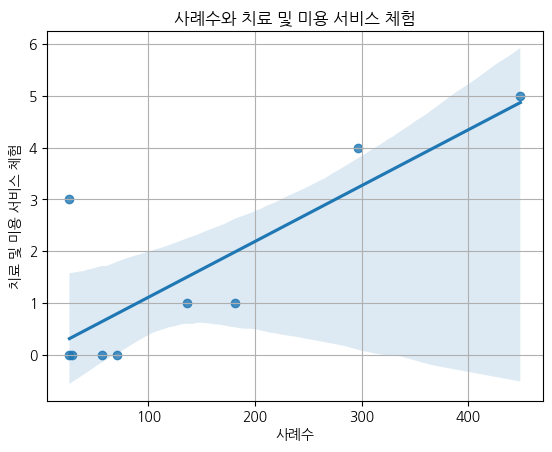

In [87]:
df2_country2.rename(columns = {"치료미용": "치료 및 미용 서비스 체험"},inplace=True)
sns.regplot(x="사례수", y="치료 및 미용 서비스 체험", data=df2_country2)
plt.title('사례수와 치료 및 미용 서비스 체험')
plt.grid()
plt.show()

In [88]:
print(stats.pearsonr(df2_country2['사례수'], df2_country2['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']))

# p-value값이 0.19로 0.05보다 큰 값을 가짐으로 두 변수가 assosiation이 없음을 알 수 있다. 

PearsonRResult(statistic=0.48479406683602055, pvalue=0.18594326442242265)


In [89]:
print(stats.pearsonr(df2_country2['사례수'], df2_country2['패션 유행 등 세련된 현대 문화 체험']))

# p-value값이 0.19로 0.05보다 큰 값을 가짐으로 두 변수가 association이 없음을 알 수 있다. 

PearsonRResult(statistic=0.4818731770304595, pvalue=0.1890028865429555)


In [90]:
np.log(df2_country2['음식/미식탐방'])

0     2.079442
1     4.043051
3     4.382027
8     3.970292
10    2.079442
11    1.791759
12    2.484907
13    1.945910
20    3.295837
Name: 음식/미식탐방, dtype: float64

In [108]:
log = df2_country2.copy()
log.head()

,국가별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,일본,26,8,2,1,1,0,0,0,0,0,0,1,0,13
1,중국,297,57,67,50,35,5,0,4,0,0,1,1,0,77
3,싱가포르,181,80,33,30,2,7,6,1,2,6,5,2,0,7
8,미국,449,53,20,33,4,12,7,5,9,4,2,3,1,296
10,영국,57,8,5,8,1,4,3,0,0,0,1,0,3,24


In [109]:
log['음식/미식탐방'] = np.log(log['음식/미식탐방'])
log['사례수'] = np.log(log['사례수'])

In [111]:
log.rename(columns = {"음식/미식탐방": "음식"}, inplace=True)
model = smf.ols(formula = '음식 ~ 사례수', data = log)
result = model.fit()
result.summary()

# '사례수'와 '음식/미식탐방'에 log를 취해보았다. 
# 회귀분석 모델이 적합한지를 보았을 때, '음식/미식탐방'을 '사례수'가 86%정도 설명해주고 있다
# log를 취하기 전에는 56%정도 였는데 86%로 정확도가 높아짐을 볼 수 있다. 
# p값이 log를 취하기 전에는 0.02였는데 log를 취한 후 0.000316로 더 작은 값이 나왔다. 

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     음식   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     43.04
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           0.000316
Time:                        22:50:27   Log-Likelihood:                -3.6420
No. Observations:                   9   AIC:                             11.28
Df Residuals:                       7   BIC:                             11.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0292      0.614     -1.676      0.138      -2.481       0.423
사례수            0.8819      0.134      6.561      0.000       0.564       1.200
==============================================================================
Omnibus:                        4.551   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                1.444
Skew:                           0.953   Prob(JB):                        0.486
Kurtosis:                       3.466   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

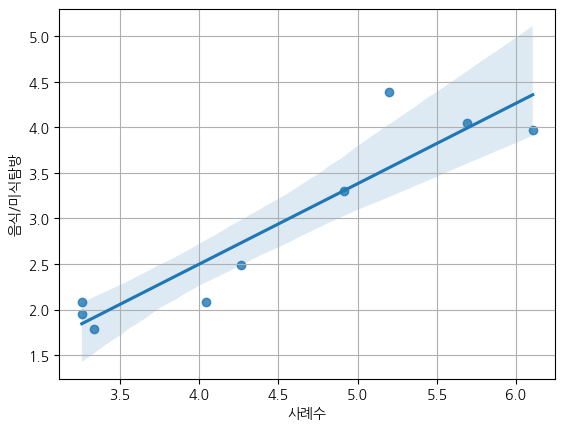

In [110]:
sns.regplot(x="사례수", y='음식/미식탐방', data=log)
plt.grid()
plt.show()

# 그래프를 통해서도 log를 취하기 전의 분포 모습보다 훨씬 더 높은 상관관계를 보여줌을 알 수 있다. 

In [112]:
log['치료 및 미용 서비스 체험'] = np.log(log['치료 및 미용 서비스 체험'])

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [101]:
log.rename(columns = {"치료 및 미용 서비스 체험": "치료미용"}, inplace=True)
model = smf.ols(formula = '치료미용 ~ 사례수', data = log)
result = model.fit()
result.summary()

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\statsmodels\regression\linear_model.py:1703: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   치료미용   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 27 Nov 2022   Prob (F-statistic):                nan
Time:                        22:49:11   Log-Likelihood:                    nan
No. Observations:                   5   AIC:                               nan
Df Residuals:                       3   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept        -inf        nan        nan        nan         nan         nan
사례수               inf        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
df2_country2[['사례수', '치료 및 미용 서비스 체험']]

,사례수,치료 및 미용 서비스 체험
0,26,0
1,297,4
3,181,1
8,449,5
10,57,0
11,28,0
12,71,0
13,26,3
20,136,1
